In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df.shape

(19158, 14)

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

Text(0, 0.5, 'Frequency')

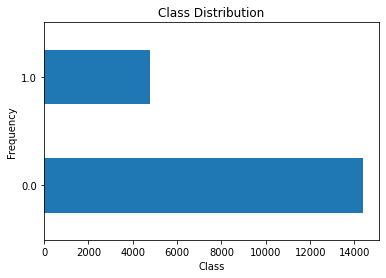

In [6]:
count_classes = pd.value_counts(df['target'], sort = True)
count_classes.plot(kind = 'barh', rot=0)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
minority_class=4777/(14381+4777)
minority_class

0.24934753105752167

In [8]:
#majority_class=14381/(14381+4777)
majority_class=1-minority_class
majority_class

0.7506524689424783

In [9]:
import pandas as pd
import collections
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [10]:
def ready_dataset(x):
    a = x.isnull().sum().tolist()
    for i in a:
        if i != 0:
            if x[x.columns[a.index(i)]].dtype == 'object' or x[x.columns[a.index(i)]].dtype == 'bool':
                x[x.columns[a.index(i)]].fillna(x[x.columns[a.index(i)]].mode()[0], inplace = True)
            elif x[x.columns[a.index(i)]].dtype == 'int64'or x[x.columns[a.index(i)]].dtype == 'float64':
                x[df.columns[a.index(i)]].fillna(x[df.columns[a.index(i)]].mean(), inplace = True)
    
    encoder_dict = collections.defaultdict(LabelEncoder)

    x = x.apply(lambda y: encoder_dict[y.name].fit_transform(y))
    
    return x    


In [11]:
df_1 = ready_dataset(df)
df_1

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,5,85,1,0,2,0,5,21,4,5,0,35,1
1,16986,77,48,1,1,2,0,5,6,4,5,4,46,0
2,6499,64,14,1,1,0,0,5,15,4,5,5,82,0
3,19067,14,52,1,1,2,0,1,20,4,5,5,51,1
4,358,50,45,1,0,2,2,5,21,4,1,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,4117,55,71,1,1,2,0,2,5,4,5,0,41,1
19154,17981,5,85,1,0,2,0,5,5,4,5,3,51,1
19155,14021,5,85,1,0,2,0,5,21,4,5,3,43,0
19156,3185,94,56,1,0,2,1,5,20,5,5,1,95,0


In [12]:
#spliting the data into dependent and indepenedent
#### Independent and Dependent Features
X=df_1.drop("target",axis=1)
y=df_1.target


In [13]:
X.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5018,5,85,1,0,2,0,5,21,4,5,0,35
1,16986,77,48,1,1,2,0,5,6,4,5,4,46
2,6499,64,14,1,1,0,0,5,15,4,5,5,82
3,19067,14,52,1,1,2,0,1,20,4,5,5,51
4,358,50,45,1,0,2,2,5,21,4,1,3,7


In [14]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [15]:
#Now we will be spilting data ito train and test data

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)


In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13410, 13)
(5748, 13)
(13410,)
(5748,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf=LogisticRegression()
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[4000  365]
 [ 973  410]]
0.767223382045929
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4365
           1       0.53      0.30      0.38      1383

    accuracy                           0.77      5748
   macro avg       0.67      0.61      0.62      5748
weighted avg       0.74      0.77      0.74      5748



In [20]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
clf1.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_pred=clf1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[3909  456]
 [ 851  532]]
0.7726165622825331
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4365
           1       0.54      0.38      0.45      1383

    accuracy                           0.77      5748
   macro avg       0.68      0.64      0.65      5748
weighted avg       0.75      0.77      0.76      5748



In [22]:
#1st technique is under sampling
#UNDER SAMPLING
from collections import Counter
Counter(y_train)


Counter({0: 10016, 1: 3394})

In [23]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

#here 0.8*

The number of classes before fit Counter({0: 10016, 1: 3394})
The number of classes after fit Counter({0: 4242, 1: 3394})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf=LogisticRegression()
clf.fit(X_train_ns,y_train_ns)
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[2955 1410]
 [ 555  828]]
0.6581419624217119
              precision    recall  f1-score   support

           0       0.84      0.68      0.75      4365
           1       0.37      0.60      0.46      1383

    accuracy                           0.66      5748
   macro avg       0.61      0.64      0.60      5748
weighted avg       0.73      0.66      0.68      5748



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
clf1.fit(X_train_ns,y_train_ns)

y_pred=clf1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[2679 1686]
 [ 448  935]]
0.6287404314544189
              precision    recall  f1-score   support

           0       0.86      0.61      0.72      4365
           1       0.36      0.68      0.47      1383

    accuracy                           0.63      5748
   macro avg       0.61      0.64      0.59      5748
weighted avg       0.74      0.63      0.66      5748



In [26]:
#2nd technique
#oversampling 
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.7)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))


The number of classes before fit Counter({0: 10016, 1: 3394})
The number of classes after fit Counter({0: 10016, 1: 7011})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf=LogisticRegression()
clf.fit(X_train_os,y_train_os)
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3566  799]
 [ 662  721]]
0.7458246346555324
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4365
           1       0.47      0.52      0.50      1383

    accuracy                           0.75      5748
   macro avg       0.66      0.67      0.66      5748
weighted avg       0.75      0.75      0.75      5748



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
clf1.fit(X_train_os,y_train_os)

y_pred=clf1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[3779  586]
 [ 729  654]]
0.7712247738343772
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4365
           1       0.53      0.47      0.50      1383

    accuracy                           0.77      5748
   macro avg       0.68      0.67      0.68      5748
weighted avg       0.76      0.77      0.77      5748



In [29]:
#3 technique 
#SMOTETomek¶
from imblearn.combine import SMOTETomek
smote=SMOTETomek(0.75)
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 10016, 1: 3394})
The number of classes after fit Counter({0: 9340, 1: 6836})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf=LogisticRegression()
clf.fit(X_train_sm,y_train_sm)
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[3489  876]
 [ 641  742]]
0.7360821155184412
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4365
           1       0.46      0.54      0.49      1383

    accuracy                           0.74      5748
   macro avg       0.65      0.67      0.66      5748
weighted avg       0.75      0.74      0.74      5748



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
clf1.fit(X_train_sm,y_train_sm)

y_pred=clf1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[3687  678]
 [ 708  675]]
0.7588726513569938
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4365
           1       0.50      0.49      0.49      1383

    accuracy                           0.76      5748
   macro avg       0.67      0.67      0.67      5748
weighted avg       0.76      0.76      0.76      5748



In [32]:
from sklearn.ensemble import BaggingClassifier


In [33]:
bcclf = BaggingClassifier()
bcclf = bcclf.fit(X_train,y_train)


In [34]:
y_pred=bcclf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[3901  464]
 [ 898  485]]
0.7630480167014614
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4365
           1       0.51      0.35      0.42      1383

    accuracy                           0.76      5748
   macro avg       0.66      0.62      0.63      5748
weighted avg       0.74      0.76      0.75      5748



In [35]:
#USING CROSS VALIDATION
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [37]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[4051  280]
 [1033  384]]
0.7715727209464162
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      4331
           1       0.58      0.27      0.37      1417

    accuracy                           0.77      5748
   macro avg       0.69      0.60      0.61      5748
weighted avg       0.74      0.77      0.74      5748



In [56]:
#CLASS WEIGHTS (giving more weights to minority class)
class_weight=dict({0:1,1:5})
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 5},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[3956  375]
 [ 927  490]]
0.7734864300626305
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      4331
           1       0.57      0.35      0.43      1417

    accuracy                           0.77      5748
   macro avg       0.69      0.63      0.64      5748
weighted avg       0.75      0.77      0.75      5748

